# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


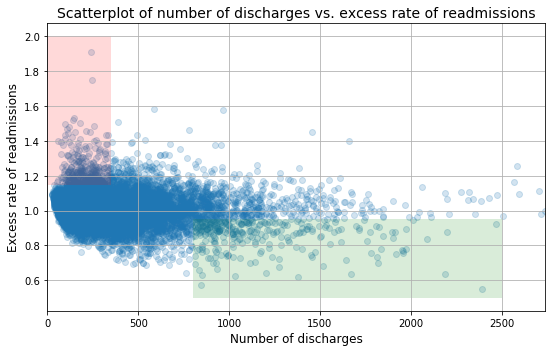

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Answer of A
I don't agree with the above analysis and recommendations. Reasons are below.

    1. The analysis above use two features as key metrics, one is "Number of Discharges", another one is "Excess Readmission Ratio". For each hospital/facility, it may have one or more "Measure Name" corresponding different "Number of Discharges" and "Excess Readmission Ratio", and maybe one "Measure" has low "Number of Discharges" or "Excess Readmission Ratio", and another one of "Measure" has high values. Thus, this hospital/facility will be split into red area and green area at the same time.
    
    2. There may be a doubt of some hospitals/facilities that whether the "Expected Readmission Rate" is really reasonable for our hospital/facility?
    
    For the two reasons above, I think analysis the distributions of "Number of Discharges" and "Number of Readmissions" corresponding to different "Measure Name" will be more accurate and reasonable.

### Answer of B
#### Data Cleaning

In [5]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [91]:
h_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != "Not Available"]
h_read_df['Number of Discharges']= h_read_df['Number of Discharges'].apply(pd.to_numeric,errors='coerce')
h_read_df = h_read_df[h_read_df['Number of Readmissions'].notna()]
h_read_df = h_read_df.reset_index()
n_dis = h_read_df['Number of Discharges'].values
n_read = h_read_df['Number of Readmissions'].values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Data Exploration

In [108]:
h_read_df['Measure Name'].value_counts(dropna=False)

READM-30-HF-HRRP          2833
READM-30-PN-HRRP          2789
READM-30-COPD-HRRP        2727
READM-30-AMI-HRRP         1777
READM-30-HIP-KNEE-HRRP    1371
Name: Measure Name, dtype: int64

#### Null Hypothesis
The "Number of Discharges" and "Number of Readmissions" are completely uncorrelated.

In [278]:
def pearson_cc(x,y):
    return np.corrcoef(x,y)[0,1]

def draw_bs_relation(x, y, func,args=None,size=1,corr=False) :
    bs_reps = []
    inds = np.arange(len(x))
    
    for i in range(size):
        if corr :
            bs_inds = np.random.choice(inds,size=len(inds))
            bs_x, bs_y = x[bs_inds], y[bs_inds]
        else :
            bs_x = np.random.choice(x, size=len(x))
            bs_y = np.random.choice(y, size=len(y))
        
        if args:
            bs_reps.append(func(bs_x,bs_y,*args))
        else:
            bs_reps.append(func(bs_x,bs_y))

    return bs_reps

In [102]:
corrcoef_d_r = pearson_cc(n_dis,n_read)
print("Pearson Correlation Coefficient of Observed: ", corrcoef_d_r)

Pearson Correlation Coefficient of Observed:  0.7912724087040413


The Pearson Correlation Coefficient of 'Number of Discharges' and 'Number of Readmissions' is near 0.79. It means there is highly likely a positive linear relationship between the two variables. 
    
Next, we will use Pearson Correlation Coefficient as test statistic, and use bootstrap method under the null hypothesis to simulate 100000 times experiments calculating the test statistic. Then we calculate the probability (p-value) of that the test statistic of replicates at least as large as the test statistic of observed.

In [283]:
bs_replicates_corrcoef = np.array(draw_bs_relation(n_dis,n_read,pearson_cc,size=100000))

<function matplotlib.pyplot.show>

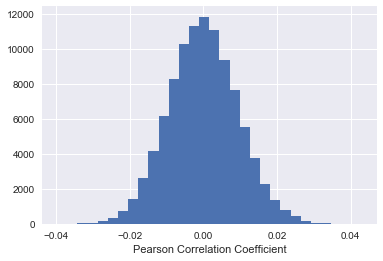

In [286]:
_ = plt.hist(bs_replicates_corrcoef,bins=30)
plt.xlabel('Pearson Correlation Coefficient')
plt.show

In [287]:
p = np.sum(bs_replicates_corrcoef >= corrcoef_d_r)/len(bs_replicates_corrcoef)
print("p-value:", p)

p-value: 0.0


The p-vlaue is very small and near zero, so we can reject the null hypothesis which means there is correlation between the two variables. Then we can have a closer look on their relationship by different "Measure Name". 

Let's see plots!

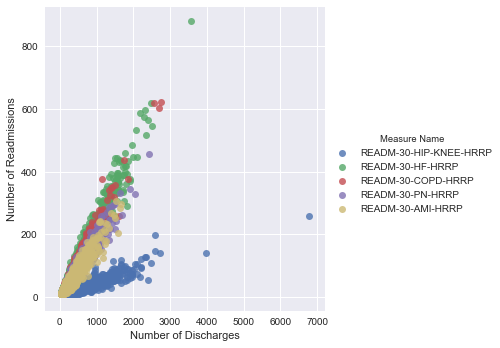

In [95]:
import seaborn as sns
sns.set()
sns.lmplot( x="Number of Discharges", y="Number of Readmissions", 
           data=h_read_df, fit_reg=False, hue='Measure Name', legend=True)
#_ = plt.plot(n_dis,n_read,marker='.',linestyle='none')
plt.show()

We can separate the plot by "Measure Name", and have a clearer look at them.

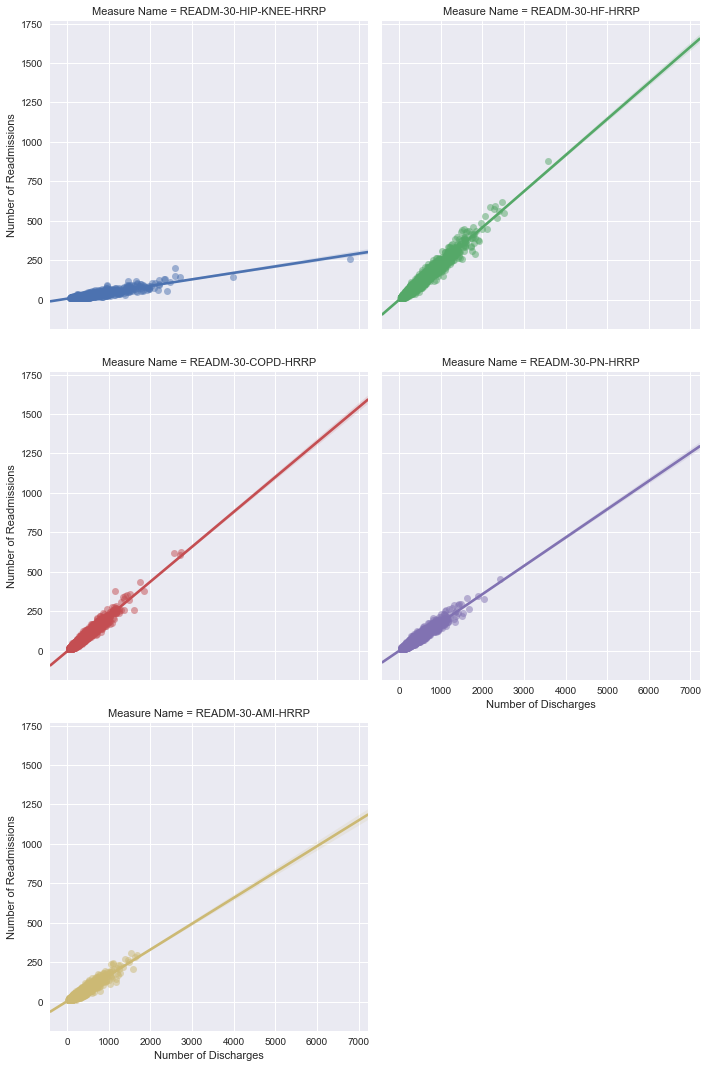

In [312]:
sns.lmplot(x="Number of Discharges", y="Number of Readmissions",hue="Measure Name",
           col="Measure Name", col_wrap=2,size=5, scatter_kws={'alpha':0.5},data=h_read_df);

Plots above show strong positive relationship between number of discharge and number of readmissions, within all five measurement categories.
    
"READM-30-HIP-KNEE-HRRP" has quite different line shape to other four measurements's.

#### Statistical Significance and Practical Significance
For statistical significance, we can pursuit working out a good enough linear models for the "Number of Discharges" and "Number of Readmissions" categorized by "Measure Name". Then we use the models to estimate the residual distributions of the population as  accurately as we can. Finally, we can use the Frequentist Inference to tell which hospital has a statistical significant difference of readmissions from the average level of population, and will apply the reduction of payment. This method can be more accurate and scientific.  But in practice, some hospitals/facilities with reduction, will protest that's unfair, because other hospitals/facilities, whose readmissions are just a bit higher than them and across the red line, don't have any reduction in their payments.  

So, we need to combine the statistics and practice. We still can use the linear model of each measurement category to calculate its residual distribution. And then find out the reasonable reduction method for each measurement category via its residual distribution.

In [318]:
hf = h_read_df['Measure Name'] == 'READM-30-HF-HRRP'
pn = h_read_df['Measure Name'] == 'READM-30-PN-HRRP'
ami = h_read_df['Measure Name'] == 'READM-30-AMI-HRRP'
copd = h_read_df['Measure Name'] == 'READM-30-COPD-HRRP'
hip_knee = h_read_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'  


hf_dis = h_read_df['Number of Discharges'][hf].values
hf_read = h_read_df['Number of Readmissions'][hf].values
hf_corrcoef = np.corrcoef(hf_dis,hf_read)[0,1]
hf_lm = np.polyfit(hf_dis,hf_read,1)

pn_dis = h_read_df['Number of Discharges'][pn].values
pn_read = h_read_df['Number of Readmissions'][pn].values
pn_corrcoef = np.corrcoef(pn_dis,pn_read)[0,1]
pn_lm = np.polyfit(pn_dis,pn_read,1)

ami_dis = h_read_df['Number of Discharges'][ami].values
ami_read = h_read_df['Number of Readmissions'][ami].values
ami_corrcoef = np.corrcoef(ami_dis,ami_read)[0,1]
ami_lm = np.polyfit(ami_dis,ami_read,1)

copd_dis = h_read_df['Number of Discharges'][copd].values
copd_read = h_read_df['Number of Readmissions'][copd].values
copd_corrcoef = np.corrcoef(copd_dis,copd_read)[0,1]
copd_lm = np.polyfit(copd_dis,copd_read,1)

hip_knee_dis = h_read_df['Number of Discharges'][hip_knee].values
hip_knee_read = h_read_df['Number of Readmissions'][hip_knee].values
hip_knee_corrcoef = np.corrcoef(hip_knee_dis,hip_knee_read)[0,1]
hip_knee_lm = np.polyfit(hip_knee_dis,hip_knee_read,1)

In [319]:
print("hf correlation coefficient: ",hf_corrcoef)
print("pn correlation coefficient: ",pn_corrcoef)
print("ami correlation coefficient: ",ami_corrcoef)
print("copd correlation coefficient: ",copd_corrcoef)
print("hip_knee correlation coefficient: ",hip_knee_corrcoef)

hf correlation coefficient:  0.9783423265947864
pn correlation coefficient:  0.9634458239036834
ami correlation coefficient:  0.9514489471021379
copd correlation coefficient:  0.9766374353644655
hip_knee correlation coefficient:  0.8984109548756176


For "READM-30-HIP-KNEE-HRRP" measurement, the Pearson correlation coefficient is near 0.898, another four measurements all have values near 1, varied from 0.951 to 0.978. They all have highly strong linear relationships between number of discharges and number of readmissions, which means the number of readmissions is increasing corresponding with the increasing of number of discharges.
    
But how can we design the method for reduction of payments considering the number of readmissions? 
    
Let's check the distribution of readmission residuals.

In [320]:
residual_hf = hf_read - (hf_dis*hf_lm[0]+hf_lm[1])
residual_pn = pn_read - (pn_dis*pn_lm[0]+pn_lm[1])
residual_ami = ami_read - (ami_dis*ami_lm[0]+ami_lm[1])
residual_copd = copd_read - (copd_dis*copd_lm[0]+copd_lm[1])
residual_hip_knee = hip_knee_read - (hip_knee_dis*hip_knee_lm[0]+hip_knee_lm[1])

In [321]:
print("hf residual - confidence interval: ",np.percentile(residual_hf,[2.5,97.5])," standard deviation: ",np.std(residual_hf))
print("pn residual - confidence interval: ",np.percentile(residual_pn,[2.5,97.5])," standard deviation: ",np.std(residual_pn))
print("ami residual - confidence interval: ",np.percentile(residual_ami,[2.5,97.5])," standard deviation: ",np.std(residual_ami))
print("copd residual - confidence interval: ",np.percentile(residual_copd,[2.5,97.5])," standard deviation: ",np.std(residual_copd))
print("hip_knee residual - confidence interval: ",np.percentile(residual_hip_knee,[2.5,97.5])," standard deviation: ",np.std(residual_hip_knee))

hf residual - confidence interval:  [-36.77422215  35.08710233]  standard deviation:  16.970452342129356
pn residual - confidence interval:  [-23.42922812  27.10019328]  standard deviation:  11.960919693299504
ami residual - confidence interval:  [-25.66994853  25.64083858]  standard deviation:  11.867488821562322
copd residual - confidence interval:  [-24.47470136  24.94249297]  standard deviation:  11.991543337860687
hip_knee residual - confidence interval:  [-16.39646355  19.09867002]  standard deviation:  8.782752253565082


In [322]:
print("hf residual - mean:",np.mean(residual_hf)," median: ",np.median(residual_hf))
print("pn residual - mean:",np.mean(residual_pn)," median: ",np.median(residual_pn))
print("ami residual - mean:",np.mean(residual_ami)," median: ",np.median(residual_ami))
print("copd residual - mean:",np.mean(residual_copd)," median: ",np.median(residual_copd))
print("hip_knee residual - mean:",np.mean(residual_hip_knee)," median: ",np.median(residual_hip_knee))

hf residual - mean: -5.136574383468709e-14  median:  0.10183261048588577
pn residual - mean: -2.6740252974320586e-14  median:  -0.2935338826135556
ami residual - mean: -6.244139201817515e-14  median:  0.18706221204912055
copd residual - mean: 4.6692063897400055e-15  median:  0.16455703123958187
hip_knee residual - mean: -3.980283158743668e-15  median:  -0.2913484756294018


From the results we calculated, we can find out that the medians of the residuals of five measurements are all closer to the theoretical linear model than their means. Median is also a popular acceptable standard for comparing difference in practice.  

#### Preliminary Report

**A. Initial observations based on plots above**
+ Number of readmissions has the strong positive relationship with number of discharges
+ Measurement of "READM-30-HIP-KNEE-HRRP" has a quite different line shape to others, while another four linear models have similar line shapes

**B. Statistics**
+ For five measurements, the values of the Pearson correlation coefficient of discharges and readmissions are all high enough to be the strong positive relationships
+ Through statistical hypothesis test, we also proved that there is the strong positive linear relationship between Number of readmissions and number of discharges
+ The medians of readmission residuals of five measurements are all closer to zero than their means, which means the median is the better parameter of calculating reduction than the mean

**C. Conclusions**
+ There is a strong positive linear relationship between the number of dischares and the number of readmissions
+ Different measurement has a different linear relationship
+ The median of residuals of readmissions is a good point matching the theoretical linear model

**D. Regulatory policy recommendations**
+ Using the different linear model for the different measurement, to calculate a different excess readmission ratio with the residuals distribution of the readmissions. Five types of measurements should have five excess readmission ratios
+ The medians of five excess readmission ratios can be the reference points. For each type of measurement of each hospital/facility, how bigger the excess readmission ratio than the median, how much should be reduced from payment 